### **Módulo 1 | Fundamentos de Machine Learning**





**Enunciado**

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Fundamentos de Machine Learning (FAM). Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” disponível no UCI Machine Learning Repository. Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas. Para este desafio é necessário baixar o arquivo “comp_bikes_mod.csv".    


**Objetivos**

Exercitar os seguintes conceitos trabalhados no Módulo:

* Análise exploratória dos dados
* Preparação dos dados
* Análise de modelos

### **Análise dos Dados**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files  #carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
# visualizando os dados
bikes = pd.read_csv("comp_bikes_mod.csv")
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


**Q1 - No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**



In [ ]:
bikes.shape

(17379, 17)

**Q2 - Quantos tipos diferentes de dados existem no dataset do desafio?**   
R: 2 (float64, object)

In [ ]:
# verificando os tipos de variáveis e se existem valores nulos
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Q3 - Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?**

In [ ]:
# total de valores nulos 
bikes["temp"].isnull().sum()

1738

In [ ]:
# % nulos do total da coluna
bikes["temp"].isnull().sum()/len(bikes['temp'])

0.10000575407100523

**Q4 - Após retirar as linhas que contém valores nulos para a coluna "dteday",     
passamos a contar com quantas instancias e atributos, respectivamente?**    
R: 15641 e 17

In [ ]:
bikes.dropna(subset=['dteday'], inplace=True)

In [ ]:
bikes.shape

(15641, 17)

> Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday".

**Q5 - Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?** R: 0.496     
**Q6 - Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?** R: 0.122

In [ ]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Q7 - Transforme a coluna "season" em valores categóricos.    
Quantas categorias diferentes existem?** R: 4

In [ ]:
# verificando o tipo da variável 
bikes['season'].dtype

dtype('float64')

In [ ]:
# transformando em valor categrico 
bikes['season'] = bikes['season'].astype('category')
bikes['season'].dtype

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

In [ ]:
# verificando quantas categorias existem 
bikes['season'].nunique()

4

**Q8 - Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?**     
R: 2012-12-31

In [ ]:
bikes['dteday'].dtype

dtype('O')

In [ ]:
#convertendo a string data para o tipo datatetime 
bikes['dteday'] = pd.to_datetime(bikes.dteday) 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
bikes.sort_values(by='dteday', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0
17366,17367.0,2012-12-31,1.0,1.0,12.0,11.0,0.0,1.0,1.0,2.0,NaN,NaN,0.60,NaN,43.0,114.0,157.0
17355,17356.0,2012-12-31,1.0,1.0,12.0,0.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,4.0,30.0,34.0
17356,17357.0,2012-12-31,1.0,NaN,12.0,1.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,6.0,13.0,19.0
17357,17358.0,2012-12-31,1.0,NaN,12.0,2.0,0.0,NaN,1.0,1.0,0.16,0.1667,0.59,0.1642,3.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21.0,2011-01-01,1.0,0.0,1.0,20.0,0.0,6.0,0.0,2.0,0.40,0.4091,0.87,0.2537,11.0,25.0,36.0
21,22.0,2011-01-01,1.0,0.0,1.0,21.0,0.0,6.0,0.0,2.0,0.40,NaN,0.87,0.1940,NaN,31.0,34.0
22,23.0,2011-01-01,1.0,0.0,NaN,22.0,0.0,6.0,0.0,2.0,NaN,0.4091,0.94,0.2239,11.0,17.0,28.0
23,24.0,2011-01-01,1.0,0.0,1.0,23.0,0.0,NaN,0.0,2.0,0.46,0.4545,0.88,0.2985,15.0,24.0,NaN


**Q9 - Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?**  
R: Existem possíveis outliers




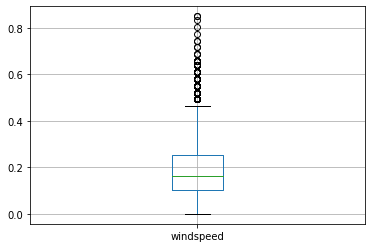

In [ ]:
bikes.boxplot(column='windspeed')

**Q10 - Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plotar a matriz de correlação.**

In [ ]:
bikes_corr = bikes[["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
bikes_corr.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.405867,0.403810,-0.323409,0.091747,1.000000


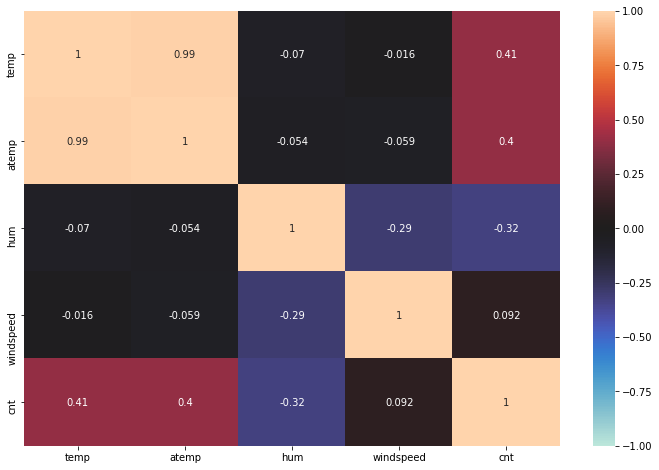

In [ ]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(12, 8))
matriz = bikes_corr.corr()  #construindo a matriz de correlação
sns.heatmap(matriz, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

## Regressão Linear 

Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios.    
Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente.    
Aplique uma regressão linear.     
Qual o valor de R2? Utilize as entradas como teste.

In [ ]:
# verificando os valores nulos das colunas 
bikes_reg = bikes[['hum', 'casual', 'cnt']]
bikes_reg.isnull().sum()

hum       1571
casual    1570
cnt       1562
dtype: int64

In [ ]:
# preenchendo os nulos com a média 
bikes_reg.fillna(bikes_reg.mean(), inplace=True)
bikes_reg.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


hum       0
casual    0
cnt       0
dtype: int64

In [ ]:
bikes_reg.head()

,hum,casual,cnt
1,0.80,8.0,40.0
2,0.80,5.0,32.0
3,0.75,3.0,13.0
4,0.75,0.0,1.0
5,0.75,0.0,1.0


In [ ]:
# definindo as variáveis de entrada e saída 
X = bikes_reg[['hum','casual']]  
y = bikes_reg['cnt'] 

In [ ]:
#importando o modelo de regressão 
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit (X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# realiza a previsão
y_pred = reg.predict(X)

In [ ]:
#análise do modelo com R2 (coeficiente de determinação)
from sklearn.metrics import r2_score 

r2 = r2_score(y, y_pred)  #realiza o cálculo do R2

print(f'Coeficiente de Determinação (R2): {r2}')

Coeficiente de Determinação (R2): 0.4059859251122173


## Árvore de Decisão

Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente).    
Aplique a árvore de decisão como regressão.    
Qual é o valor aproximado de R2? 

In [ ]:
# variáveis de entrada e saída 
X = bikes_reg[['hum','casual']]  
y = bikes_reg['cnt'] 

In [ ]:
#importando a árvore de decisão como regressor
from sklearn.tree import DecisionTreeRegressor   

tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred_tree = tree.predict(X)

In [ ]:
# métricas R2

r2_tree = r2_score(y, y_pred_tree)  #realiza o cálculo do R2

print(f'Coeficiente de Determinação (R2): {r2_tree}')

Coeficiente de Determinação (R2): 0.7098339715834964
